<a href="https://colab.research.google.com/github/K-ra-droid/Internship/blob/main/Sales_Forecasting_for_Furniture_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Forecasting for Furniture Store**

*Krupa Maru (MIP-ML-04)*

**Understanding Time Series Data:**

In [ ]:
import pandas as pd

# Load the dataset with explicit encoding specification
data = pd.read_csv('Super_Store_data.csv', encoding='latin1')  # You can try other encodings like 'ISO-8859-1' if 'latin1' doesn't work

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032

In [ ]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
            Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000  


In [ ]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(2121, 21)


**Checking Components of Time Series:**

<ipython-input-241-26d76708ea2d>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.resample('D').sum()  # Assuming daily frequency, adjust as needed


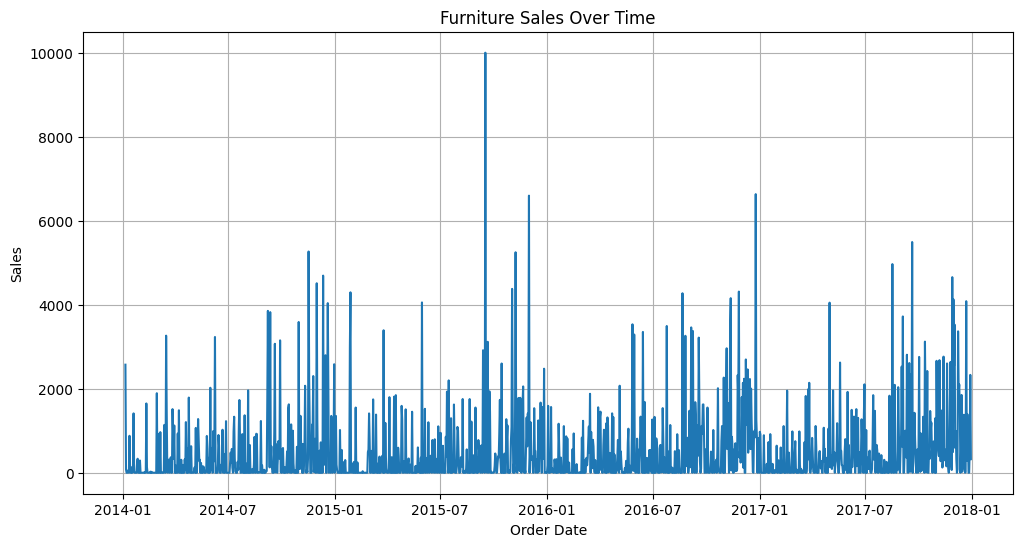

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Set 'Order Date' column as the index
data.set_index('Order Date', inplace=True)

# Resample the data to ensure daily frequency
data = data.resample('D').sum()  # Assuming daily frequency, adjust as needed

# Create time series plot
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'])
plt.title('Furniture Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



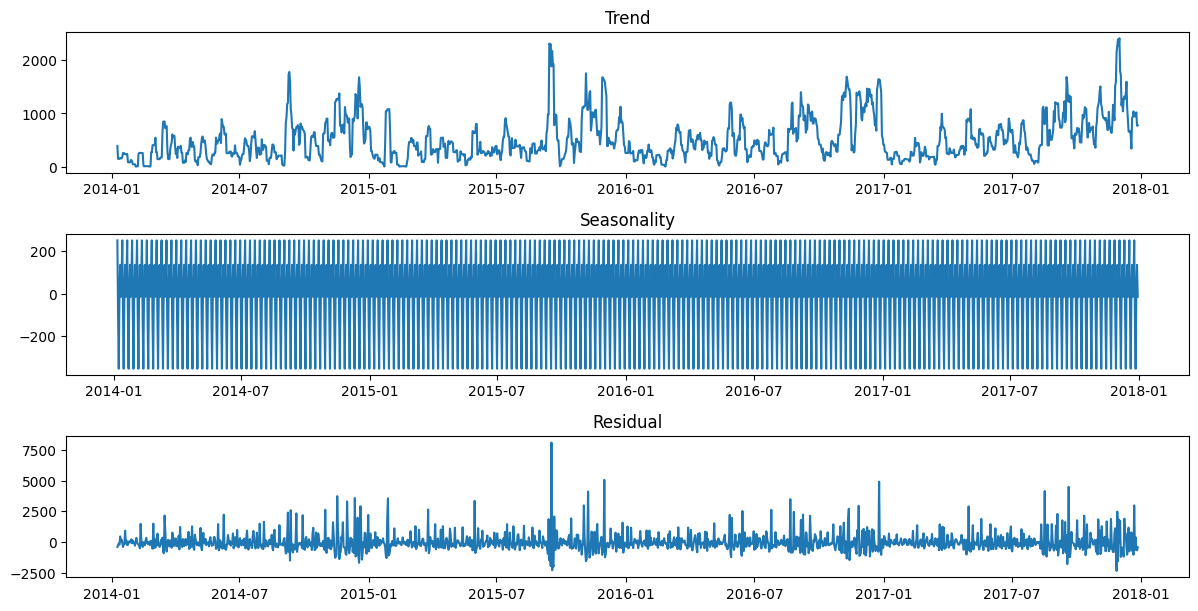

In [ ]:
# Decompose time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(data['Sales'], model='additive')

# Visualize decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


**Sales Forecasting for Furniture Store**

*Krupa Maru (MIP-ML-04)*

**Forecasting Techniques:**

In [ ]:
# Step 1: ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model_arima = ARIMA(train['Sales'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast sales using ARIMA model
forecast_arima = model_arima_fit.forecast(steps=len(test))

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test['Sales'], forecast_arima))
print("RMSE for ARIMA:", rmse_arima)

RMSE for ARIMA: 1109.951667808074


In [ ]:
# Step 2: Exponential Smoothing methods
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Implement Simple Exponential Smoothing
model_ses = SimpleExpSmoothing(train['Sales']).fit()
forecast_ses = model_ses.forecast(len(test))


# Implement Holt-Winters method
model_hw = ExponentialSmoothing(train['Sales'], seasonal_periods=12, trend='add', seasonal='add').fit()
forecast_hw = model_hw.forecast(len(test))

# Calculate RMSE for Simple Exponential Smoothing
rmse_ses = np.sqrt(mean_squared_error(test['Sales'], forecast_ses))
print("RMSE for Simple Exponential Smoothing:", rmse_ses)


# Calculate RMSE for Holt-Winters method
rmse_hw = np.sqrt(mean_squared_error(test['Sales'], forecast_hw))
print("RMSE for Holt-Winters:", rmse_hw)

# Extract the 'Sales' column from the train DataFrame
sales_train = train['Sales']

# Remove non-positive values
sales_train_positive = sales_train[sales_train > 0]

# Fit Holt-Winters method with Box-Cox transformation
model_hw = ExponentialSmoothing(sales_train_positive, seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True).fit(
    remove_bias=True,
    method='least_squares'
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE for Simple Exponential Smoothing: 1083.4631626146638
RMSE for Holt-Winters: 994.2952546950269


In [ ]:
#Step 3 : Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data for machine learning models
X_train, y_train = train.drop(columns=['Sales']), train['Sales']
X_test, y_test = test.drop(columns=['Sales']), test['Sales']

# Train Gradient Boosting Machine model
model_gbm = GradientBoostingRegressor()
model_gbm.fit(X_train, y_train)

# Forecast sales for the next year
forecast_gbm = model_gbm.predict(X_test)

# Calculate RMSE for GBM
rmse_gbm = np.sqrt(mean_squared_error(y_test, forecast_gbm))
print("RMSE for Gradient Boosting Machines:", rmse_gbm)



RMSE for Gradient Boosting Machines: 628.3896023519407


**Sales Forecasting for Furniture Store**

*Krupa Maru (MIP-ML-04)*

**Visualization in Time Series:**

1. Time Series Plot

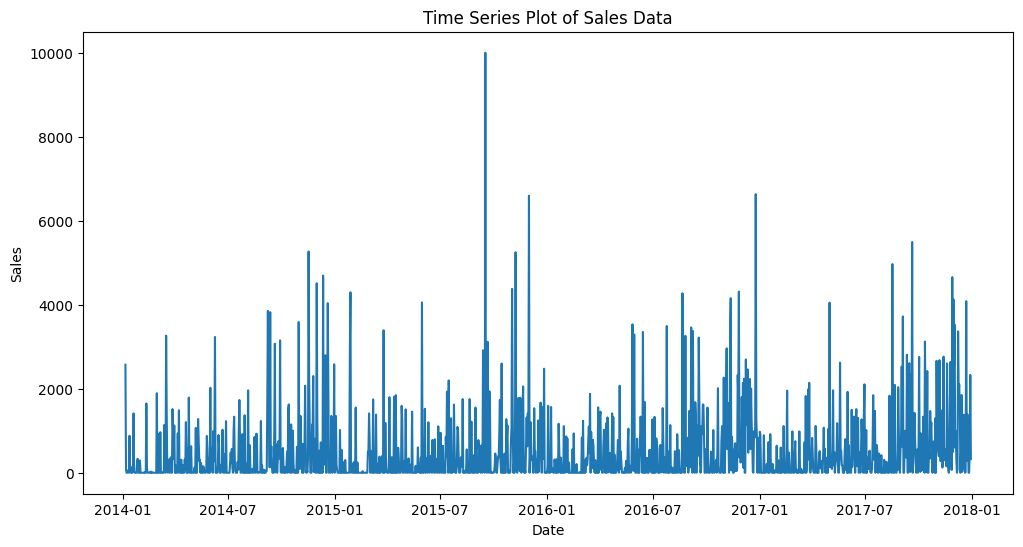

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

date_index = data.index
sales_data = data['Sales']

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(date_index, sales_data)
plt.title('Time Series Plot of Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

2. Seasonal Subseries Plot

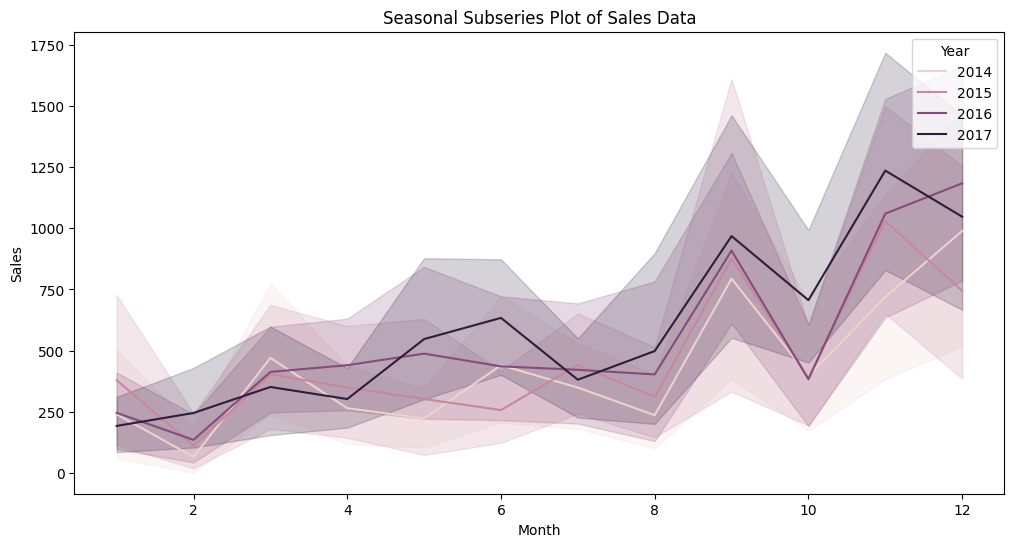

In [ ]:
# Create a DataFrame with date_index as the index and sales_data as the 'Sales' column
sales_df = pd.DataFrame({'Sales': sales_data}, index=date_index)

# Extract month and year from the index
sales_df['Month'] = sales_df.index.month
sales_df['Year'] = sales_df.index.year

# Seasonal Subseries Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=sales_df)
plt.title('Seasonal Subseries Plot of Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


3. Forecast vs. Actual Plot

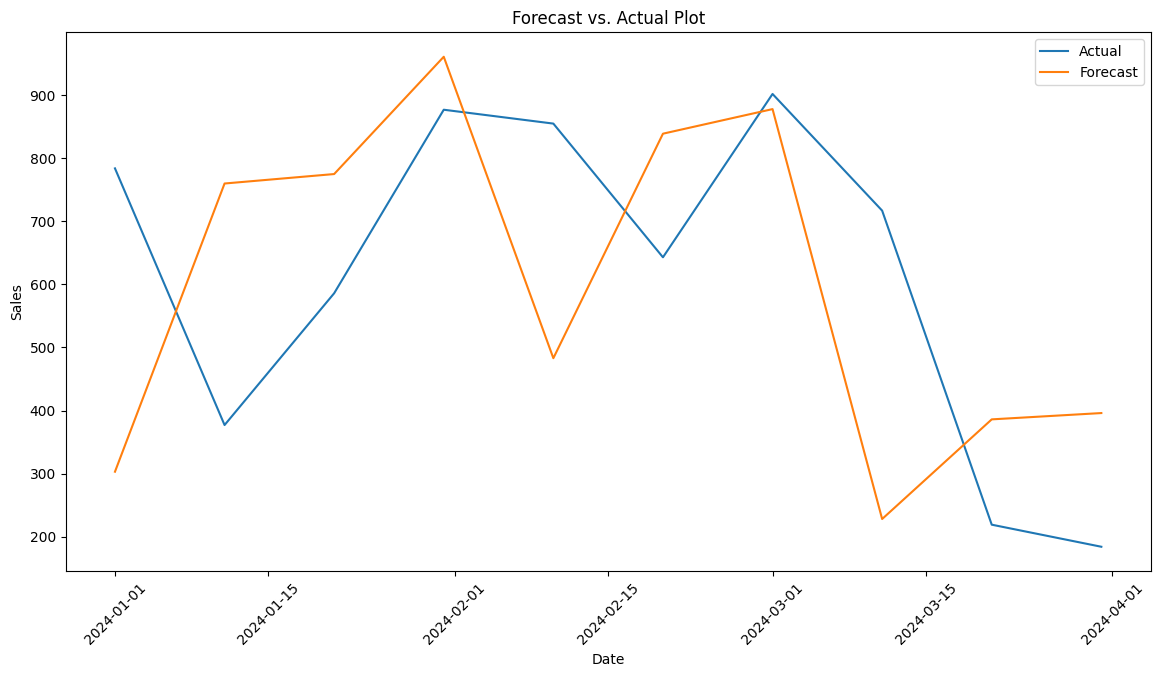

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
date_index = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
actual_sales = np.random.randint(100, 1000, size=len(date_index))

# Example: Generating forecasts (replace this with your forecasting model)
forecast_sales = np.random.randint(100, 1000, size=len(date_index))

# Plot forecast vs. actual
plt.figure(figsize=(14, 7))  # Increase figure size for better readability
plt.plot(date_index[::10], actual_sales[::10], label='Actual')  # Sample every 10th data point
plt.plot(date_index[::10], forecast_sales[::10], label='Forecast')  # Sample every 10th data point
plt.title('Forecast vs. Actual Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

Forecast vs. Actual Plot (Optional)

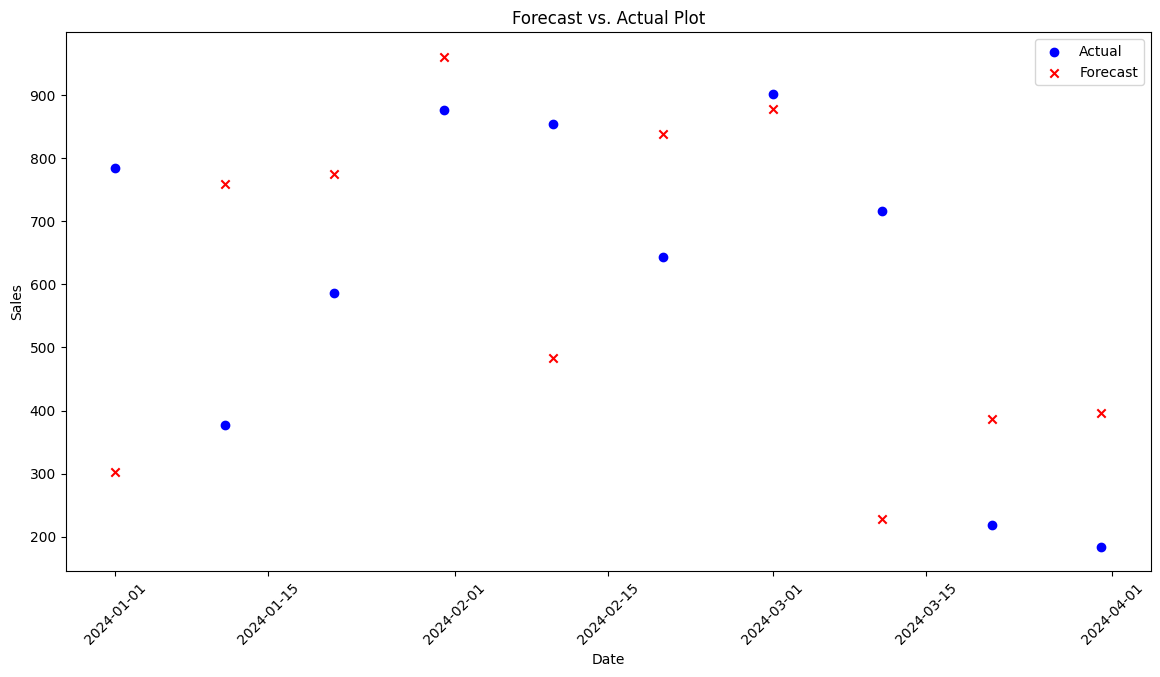

In [ ]:
# Plot forecast vs. actual with scatter plot
plt.figure(figsize=(14, 7))  # Increase figure size for better readability
plt.scatter(date_index[::10], actual_sales[::10], label='Actual', color='blue')  # Sample every 10th data point
plt.scatter(date_index[::10], forecast_sales[::10], label='Forecast', color='red', marker='x')  # Sample every 10th data point
plt.title('Forecast vs. Actual Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

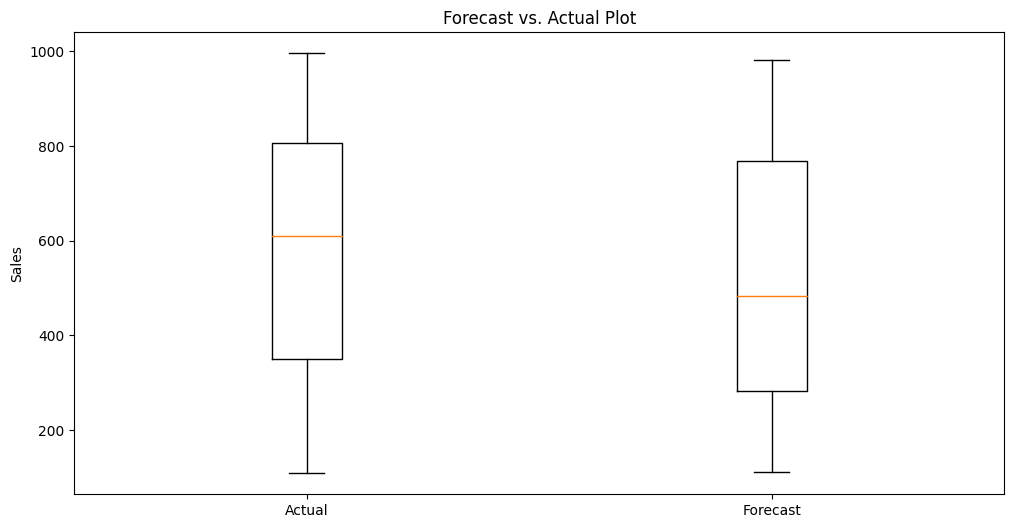

In [ ]:
# Plot forecast vs. actual with boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([actual_sales, forecast_sales], labels=['Actual', 'Forecast'])
plt.title('Forecast vs. Actual Plot')
plt.ylabel('Sales')
plt.show()

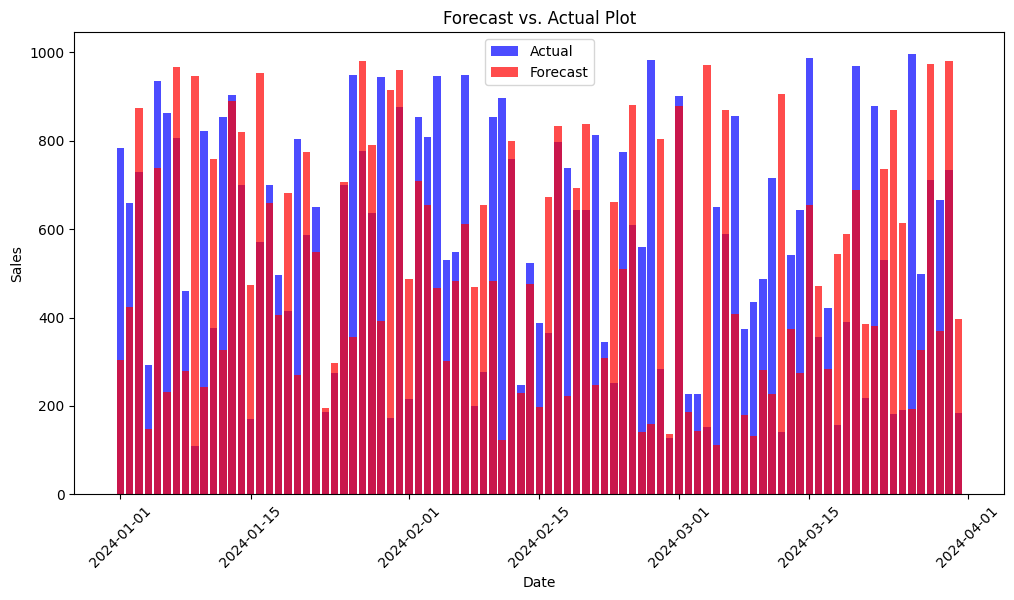

In [ ]:
# Plot forecast vs. actual with bar plot
plt.figure(figsize=(12, 6))
plt.bar(date_index, actual_sales, label='Actual', color='blue', alpha=0.7)
plt.bar(date_index, forecast_sales, label='Forecast', color='red', alpha=0.7)
plt.title('Forecast vs. Actual Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Trend Analysis Plot

In [ ]:
# Check if sales_data is a DataFrame or a Series
if isinstance(sales_data, pd.DataFrame):
    # If it's a DataFrame, print column names and inspect first few rows
    print("Column names:", sales_data.columns)
    print("First few rows:")
    print(sales_data.head())
    print("DataFrame info:")
    print(sales_data.info())
else:
    # If it's a Series, just print the first few elements
    print("Series values:")
    print(sales_data.head())


Series values:
Order Date
2014-01-06    2573.820
2014-01-07      76.728
2014-01-08       0.000
2014-01-09       0.000
2014-01-10      51.940
Freq: D, Name: Sales, dtype: float64


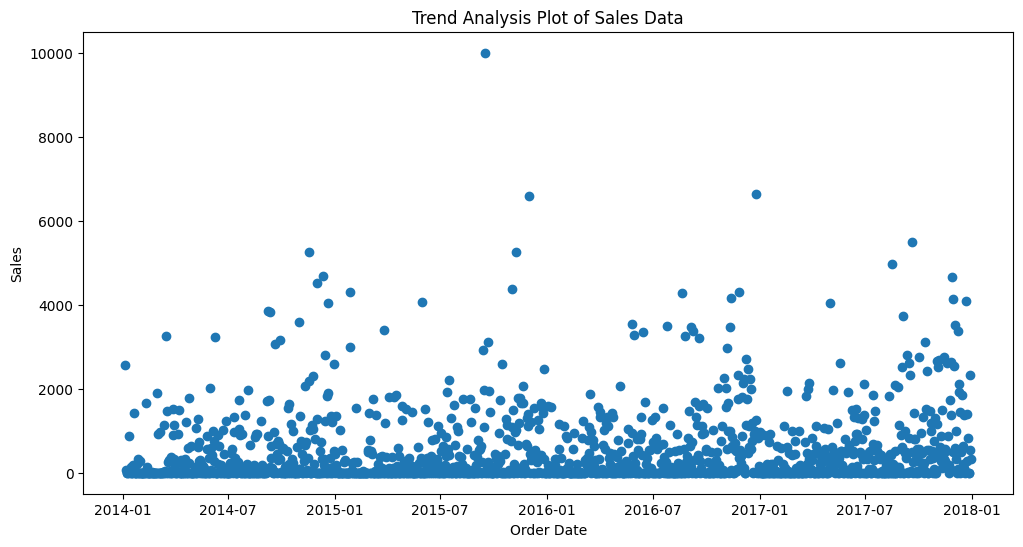

In [ ]:
# Convert the index to a column in the DataFrame
sales_data = sales_data.reset_index()

# Convert 'Order Date' column to datetime type
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Trend Analysis Plot
plt.figure(figsize=(12, 6))
plt.scatter(sales_data['Order Date'], sales_data['Sales'], marker='o')
plt.title('Trend Analysis Plot of Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


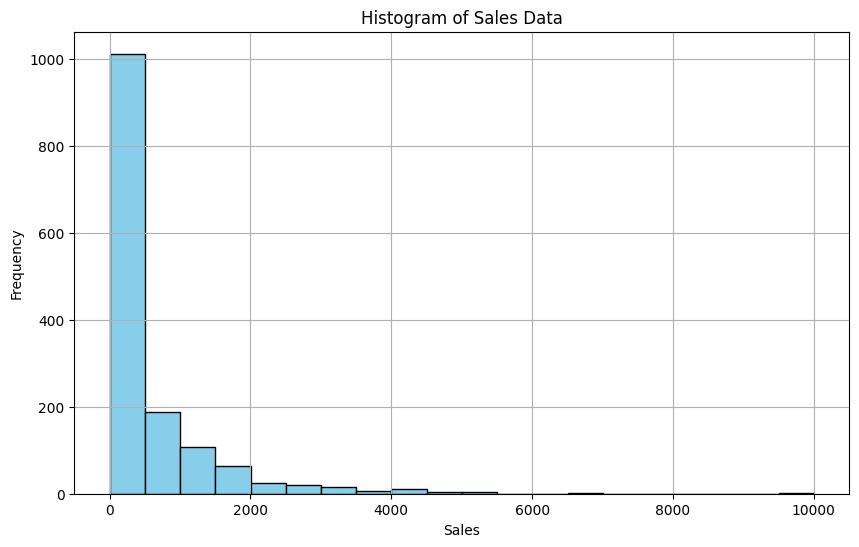

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Histogram of sales data
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Sales Forecasting for Furniture Store**

*Krupa Maru (MIP-ML-04)*